<a href="https://colab.research.google.com/github/huyminh1115/Webmining-citation/blob/main/preprocessing_citationV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path in Google Drive
file_path = '/content/drive/My Drive/data-citation/citation-raw.txt'  # Replace 'your_file_name.txt' with your actual file name


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Initialize variables to store the parsed data
data = []

# Open and read the file
with open(file_path, 'r') as file:
    current_paper = {}
    for line in file:
        line = line.strip()
        if not line:  # Skip empty lines
            continue
        if line.startswith('#*'):
            if current_paper:
                # Save the previous paper before starting a new one
                current_paper['References'] = ', '.join(current_paper.get('References', [])) if current_paper.get('References') else None
                data.append(current_paper)
            current_paper = {'Title': line[2:].strip(), 'References': []}
        elif line.startswith('#@'):
            current_paper['Authors'] = line[2:].strip()
        elif line.startswith('#t'):
            current_paper['Year'] = line[2:].strip()
        elif line.startswith('#c'):
            current_paper['Venue'] = line[2:].strip()
        elif line.startswith('#index'):
            current_paper['Index'] = line[6:].strip()
        elif line.startswith('#%'):
            current_paper['References'].append(line[2:].strip())
        elif line.startswith('#!'):
            current_paper['Abstract'] = line[2:].strip()

    # Add the last paper
    if current_paper:
        current_paper['References'] = ', '.join(current_paper.get('References', [])) if current_paper.get('References') else None
        data.append(current_paper)

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Ensure all columns are present in the DataFrame
default_columns = ['Title', 'Authors', 'Year', 'Venue', 'Index', 'References', 'Abstract']
for col in default_columns:
    if col not in df.columns:
        df[col] = None

df = df[['Title', 'Authors', 'Year', 'Venue', 'References', 'Abstract']]

In [ ]:
# Display the DataFrame
df.head(5)

,Title,Authors,Year,Venue,References,Abstract
0,OQL[C++]: Extending C++ with an Object Query C...,José A. Blakeley,1995,Modern Database Systems,None,NaN
1,Transaction Management in Multidatabase Systems.,"Yuri Breitbart,Hector Garcia-Molina,Abraham Si...",1995,Modern Database Systems,None,NaN
2,Overview of the ADDS System.,"Yuri Breitbart,Tom C. Reyes",1995,Modern Database Systems,None,NaN
3,Multimedia Information Systems: Issues and App...,"Stavros Christodoulakis,Leonidas Koveos",1995,Modern Database Systems,None,NaN
4,Active Database Systems.,"Umeshwar Dayal,Eric N. Hanson,Jennifer Widom",1995,Modern Database Systems,None,NaN


In [ ]:
# Updating the DataFrame

df['Authors'] = df['Authors'].apply(lambda x: x.split(','))

# Fixing the issue by ensuring proper parsing of the "References" column

def parse_references(ref):
    if isinstance(ref, list):  # If already a list, no need to process
        return ref
    try:
        return [int(r.strip()) for r in str(ref).strip("[]").split(',')]
    except ValueError:
        return []
# Apply the parsing function to the "References" column

df['References'] = df['References'].apply(parse_references)

In [ ]:
# Display the updated DataFrame to the user
df.head(10)

,Title,Authors,Year,Venue,References,Abstract
0,OQL[C++]: Extending C++ with an Object Query C...,[José A. Blakeley],1995,Modern Database Systems,[],NaN
1,Transaction Management in Multidatabase Systems.,"[Yuri Breitbart, Hector Garcia-Molina, Abraham...",1995,Modern Database Systems,[],NaN
2,Overview of the ADDS System.,"[Yuri Breitbart, Tom C. Reyes]",1995,Modern Database Systems,[],NaN
3,Multimedia Information Systems: Issues and App...,"[Stavros Christodoulakis, Leonidas Koveos]",1995,Modern Database Systems,[],NaN
4,Active Database Systems.,"[Umeshwar Dayal, Eric N. Hanson, Jennifer Widom]",1995,Modern Database Systems,[],NaN
5,Where Object-Oriented DBMSs Should Do Better: ...,"[Angelika Kotz Dittrich, Klaus R. Dittrich]",1995,Modern Database Systems,[],NaN
6,Distributed Databases.,"[Hector Garcia-Molina, Meichun Hsu]",1995,Modern Database Systems,[],NaN
7,An Object-Oriented DBMS War Story: Developing ...,[Nathan Goodman],1995,Modern Database Systems,[],NaN
8,Cooperative Transactions for Multiuser Environ...,[Gail E. Kaiser],1995,Modern Database Systems,[],NaN
9,Schema Architecture of the UniSQL/M Multidatab...,"[William Kelley, Sunit K. Gala, Won Kim, Tom C...",1995,Modern Database Systems,[],NaN


In [ ]:
# Additional code for statistics

# Check for missing values
missing_values = df.isna().sum()
print("Missing values per column:")
print(missing_values)


# Check for missing values (in percentage)
missing_values = df.isna().mean() * 100
print("Missing values per column (in %):")
print(missing_values)

# Summary statistics
print("\nSummary statistics:")
summary_stats = df.describe(include='all').transpose()

# Add % of unique and count to the summary statistics
summary_stats['% Unique'] = (df.nunique() / len(df) * 100).values
print(summary_stats)

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

Missing values per column:
Title               0
Authors             0
Year                0
Venue               0
References    1198086
Abstract       981537
dtype: int64
Missing values per column (in %):
Title          0.000000
Authors        0.000000
Year           0.000000
Venue          0.000000
References    79.289097
Abstract      64.957926
dtype: float64

Summary statistics:
              count   unique  \
Title       1511035  1481988   
Authors     1511035  1043377   
Year        1511035       77   
Venue       1511035     6506   
References   312949   298948   
Abstract     529498   518901   

                                                          top    freq  \
Title                                              Editorial.    1980   
Authors                                                         13609   
Year                                                     2009  146916   
Venue                                                    CoRR   25566   
References              

In [ ]:
# Access row n (replace n with the row number you want to access)
row_1 = 415238  # Replace 0 with the index of the row you want to access
row_2 = 209940  # Replace 0 with the index of the row you want to access
print(f"Row {row_1}:")
# print(df.iloc[row_1])
print(df.iloc[row_1]['Title'])
print("===============")
print(f"Row {row_2}:")
# print(df.iloc[row_2])
print(df.iloc[row_2]['Title'])

Row 415238:
The Query Complexity of Program Checking by Constant-Depth Circuits.
Row 209940:
Proof Verification and Hardness of Approximation Problems


In [ ]:
# Find indexes of rows with exact duplicate titles along with titles
duplicate_groups = (
    df.groupby('Title').apply(lambda x: {'Title': x.name, 'Indexes': list(x.index)} if len(x) > 1 else None)
    .dropna()
    .tolist()
)

print("\nGroups of rows with exact duplicate titles:")
for group in duplicate_groups:
    print(f"Title: {group['Title']}, Indexes: {group['Indexes']}")

<ipython-input-47-3a7f4968bbfa>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Title').apply(lambda x: {'Title': x.name, 'Indexes': list(x.index)} if len(x) > 1 else None)


Streaming output truncated to the last 5000 lines.
Title: Patterns in Enterprise Architecture Management (PEAM 2009)., Indexes: [579783, 1385143]
Title: Patterns of Co-Linear Equidistant Letter Sequences and Verses., Indexes: [346111, 346112, 346113]
Title: Patterns., Indexes: [860604, 1028753, 1070766, 1198742]
Title: Paul R. Cohen's Empirical Methods for Artificial Intelligence., Indexes: [744917, 745214]
Title: Peak Transform for Efficient Image Representation and Coding., Indexes: [428730, 1102750]
Title: Pedestrian detection and tracking at crossroads., Indexes: [320293, 1040787]
Title: Peer Data Management., Indexes: [1198095, 1295543]
Title: Peer data exchange., Indexes: [545024, 1118765]
Title: Peer to Peer., Indexes: [1197783, 1199303]
Title: Peer-Based Intelligent Tutoring Systems: A Corpus-Oriented Approach., Indexes: [1347281, 1376634]
Title: Peirce Algebras., Indexes: [39975, 876197]
Title: Penetration Testing., Indexes: [153104, 1197303]
Title: Pentium Pro Processor Desig

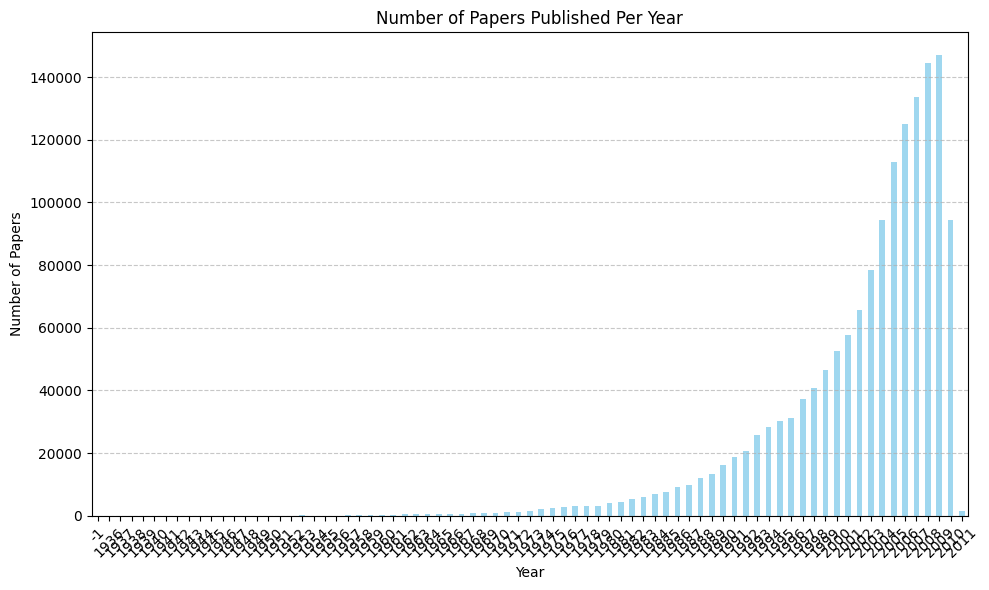

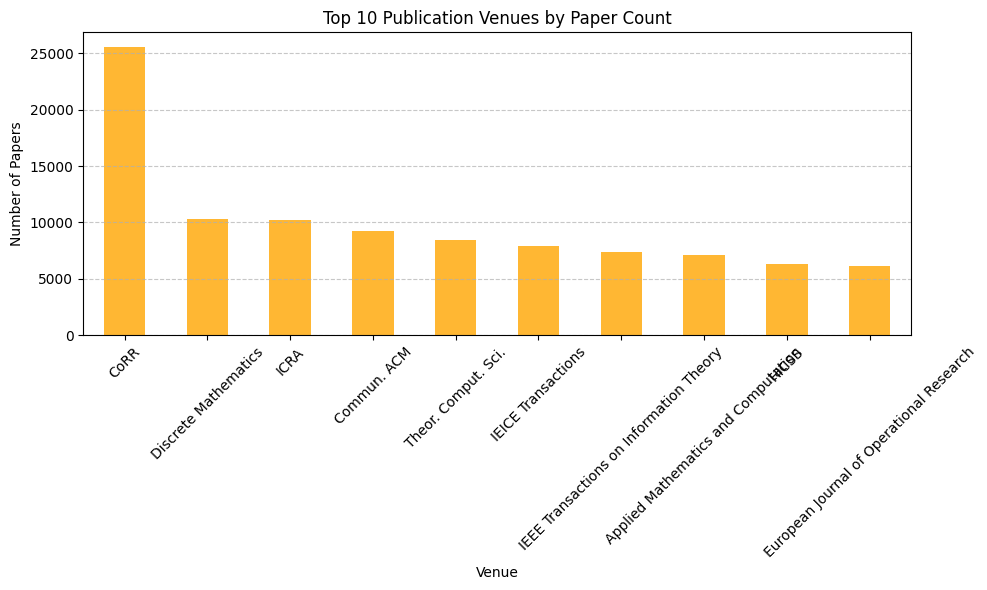

In [ ]:
import matplotlib.pyplot as plt

# Visualization for insights
plt.figure(figsize=(10, 6))
# Plot the number of papers per year
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
num_papers_per_year = df['Year'].value_counts().sort_index()
num_papers_per_year.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Number of Papers Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the top 10 venues by paper count
plt.figure(figsize=(10, 6))
top_venues = df['Venue'].value_counts().head(10)
top_venues.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Top 10 Publication Venues by Paper Count')
plt.xlabel('Venue')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Total unique authors: 882733


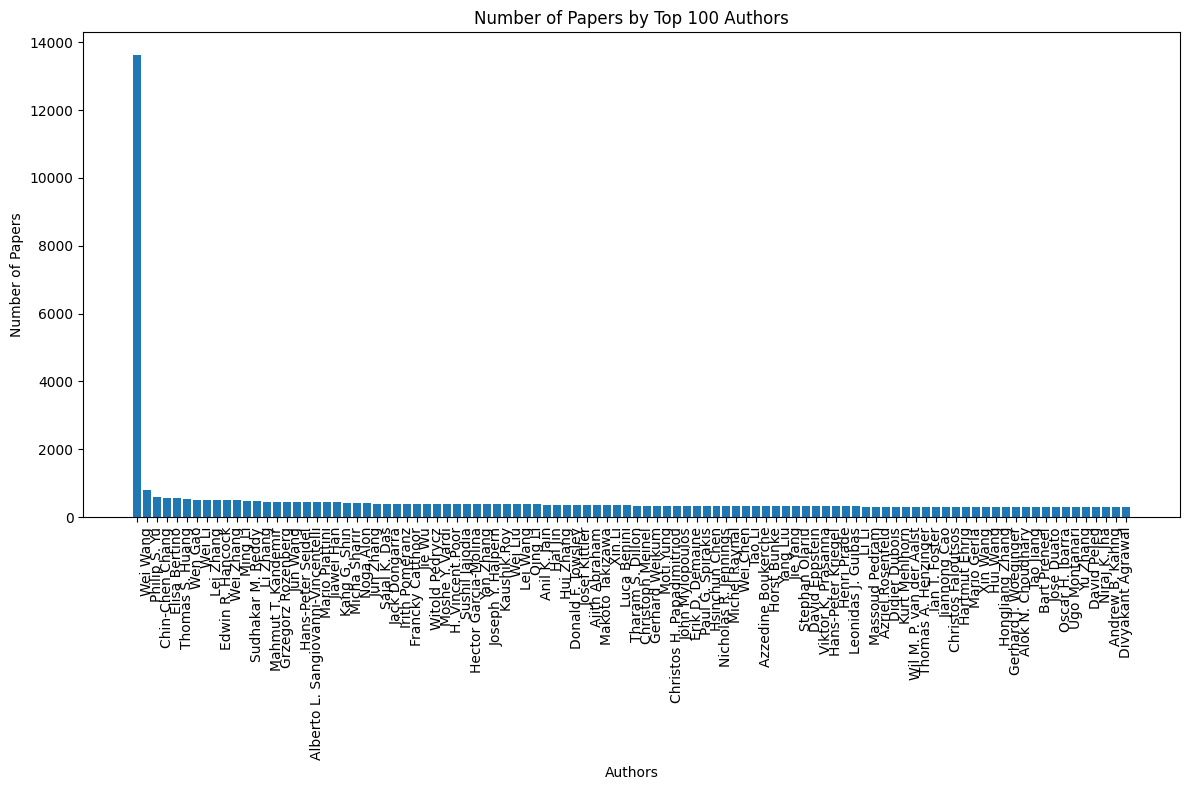

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Flatten the authors list to count unique authors
all_authors = [author for authors_list in df['Authors'] for author in authors_list]
author_counts = Counter(all_authors)

# Calculate total unique authors
total_unique_authors = len(author_counts)
print(f"Total unique authors: {total_unique_authors}")

# Sort the authors by the number of papers in descending order
sorted_author_counts = dict(sorted(author_counts.items(), key=lambda item: item[1], reverse=True))

# Keep only the top 100 authors
top_100_authors = dict(list(sorted_author_counts.items())[:100])

# Create a bar plot for the top 100 authors
plt.figure(figsize=(12, 8))
plt.bar(top_100_authors.keys(), top_100_authors.values())
plt.xlabel('Authors')
plt.ylabel('Number of Papers')
plt.title('Number of Papers by Top 100 Authors')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Re-importing necessary libraries and redefining the function due to environment reset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate similarity between two text inputs
def calculate_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    return similarity

# Example usage with two input strings (titles or abstracts)
text1 = "PerThe Query Complexity of Program Checking by Constant-Depth Circuits."
text2 = "Proof Verification and Hardness of Approximation Problems"

# Calculate and print the similarity
similarity_score = calculate_similarity(text1, text2)
similarity_score


0.06437099366532754